#### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC,SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


#### Load Data 

In [2]:
url= "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat"
coulmns =  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart = pd.read_csv(url, names=coulmns,  delimiter=' ',)

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


Expanation about the columns:
- age: Age of the individual.
- sex: Gender of the individual (0 for female, 1 for male).
- cp: Chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic).
- trestbps: Resting blood pressure.
- chol: Serum cholesterol level.
- fbs: Fasting blood sugar > 120 mg/dl (1 for true, 0 for false).
- restecg: Resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy).
- thalach: Maximum heart rate achieved.
- exang: Exercise-induced angina (1 for yes, 0 for no).
- oldpeak: ST depression induced by exercise relative to rest.
- slope: Slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping).
- ca: Number of major vessels colored by fluoroscopy.
- thal: Thalassemia type (3: normal, 6: fixed defect, 7: reversible defect).
- target: Presence of heart disease (1 for yes, 0 for no).

### Split the data

In [4]:
X = heart.drop('target', axis=1)
y = heart['target']

### Standardize numerical features

In [6]:
scalar= StandardScaler()
X_scaled = pd.DataFrame(scalar.fit_transform(X), columns= X.columns)


#### Train and Test the model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Initialize the SVM model


In [10]:
model = SVC(kernel ='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

### Make Predictions

In [11]:
y_pred = model.predict(X_test)

### Evaluate the accuracy

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8888888888888888


### We also may check Confusion Matrix


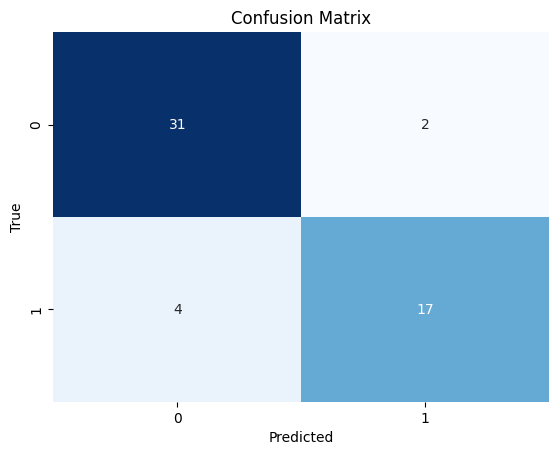

Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.94      0.91        33
           2       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

In [16]:
heart['target']

0      2
1      1
2      2
3      1
4      1
      ..
265    1
266    1
267    1
268    1
269    2
Name: target, Length: 270, dtype: int64